In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cols_names= ["epoch", "train_pde_loss", "train_bc1", "train_bc2", "train_bc3", "train_bc4", "test_pde_loss", "test_bc1", "test_bc2", "test_bc3", "test_bc4", "test_metric"]
df = pd.read_csv("case_3_1_loss.dat", sep=" ", header=None, names=cols_names)
df.head()

,epoch,train_pde_loss,train_bc1,train_bc2,train_bc3,train_bc4,test_pde_loss,test_bc1,test_bc2,test_bc3,test_bc4,test_metric
0,0.0,505649.812500,0.000000,0.000000,0.015085,0.002794,470786.843750,0.000000,0.000000,0.015085,0.002794,1.044266
1,1000.0,513.486938,5.225085,15.421953,3.265930,79.353943,442.137115,5.225085,15.421953,3.265930,79.353943,4.679232
2,2000.0,224.386230,1.677356,25.267143,0.811645,32.328842,193.414276,1.677356,25.267143,0.811645,32.328842,1.282459
3,3000.0,11.398517,4.423364,0.642917,0.146392,2.466214,19.382593,4.423364,0.642917,0.146392,2.466214,1.418322
4,4000.0,2.367253,2.853365,0.221841,0.420556,0.389926,4.190342,2.853365,0.221841,0.420556,0.389926,1.166616


In [4]:
bcs_loss = df.iloc[:,7:11]

In [5]:
total_bc_loss = df.iloc[:,7:11].sum(axis=1)

In [6]:
combined = df[["epoch", "test_pde_loss"]]
combined["total_bc_loss"] = total_bc_loss
combined["total_loss"] = combined["test_pde_loss"] + combined["total_bc_loss"]
combined.head()

<ipython-input-6-ad04e05f5250>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["total_bc_loss"] = total_bc_loss
<ipython-input-6-ad04e05f5250>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["total_loss"] = combined["test_pde_loss"] + combined["total_bc_loss"]


,epoch,test_pde_loss,total_bc_loss,total_loss
0,0.0,470786.843750,0.017878,470786.861628
1,1000.0,442.137115,103.266912,545.404027
2,2000.0,193.414276,60.084987,253.499263
3,3000.0,19.382593,7.678886,27.061480
4,4000.0,4.190342,3.885688,8.076030


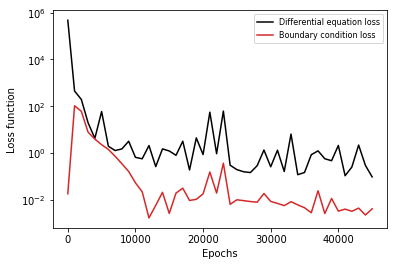

In [7]:
fig, ax = plt.subplots()
#fig, ax = plt.subplots(figsize=(12,10))

ax.plot(combined["epoch"], combined["test_pde_loss"], "k", label="Differential equation loss")
ax.plot(combined["epoch"], combined["total_bc_loss"], "tab:red", label="Boundary condition loss")

ax.set_yscale('log')
ax.legend(fontsize=8)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss function")
plt.savefig("case_1_loss.png", dpi=200)

In [2]:
cols_names= ["epoch", "train_pde_loss", "train_bc1", "train_bc2", "train_bc3", "train_bc4", "train_ic1", "train_ic2", "test_pde_loss", "test_bc1", "test_bc2", "test_bc3", "test_bc4", "test_ic1", "test_ic2", "test_metric"]
df = pd.read_csv("case_2_time_final_loss.dat", sep=" ", header=None, names=cols_names)
df.head()

,epoch,train_pde_loss,train_bc1,train_bc2,train_bc3,train_bc4,train_ic1,train_ic2,test_pde_loss,test_bc1,test_bc2,test_bc3,test_bc4,test_ic1,test_ic2,test_metric
0,0.0,3765.420654,0.011745,0.000365,0.063482,0.006836,0.770433,0.038435,3905.450684,0.011745,0.000365,0.063482,0.006836,0.770433,0.038435,1.142649
1,1000.0,3.146962,1.850057,1.549975,0.127028,12.109324,0.249814,4.678821,2.389611,1.850057,1.549975,0.127028,12.109324,0.249814,4.678821,1.144762
2,2000.0,0.776334,0.108927,1.058733,0.042123,0.571882,0.068987,1.123482,0.467216,0.108927,1.058733,0.042123,0.571882,0.068987,1.123482,0.380513
3,3000.0,0.202493,0.016351,0.187902,0.001369,0.126737,0.019237,0.191938,0.133987,0.016351,0.187902,0.001369,0.126737,0.019237,0.191938,0.116669
4,4000.0,0.083925,0.002144,0.050513,0.000470,0.042962,0.002491,0.027867,0.061972,0.002144,0.050513,0.000470,0.042962,0.002491,0.027867,0.040081


In [3]:
bcs_loss = df.iloc[:,9:13]
total_bc_loss = bcs_loss.sum(axis=1)

ic_loss = df.iloc[:,-3:-1]
total_ic_loss = ic_loss.sum(axis=1)

In [4]:
combined = df[["epoch", "test_pde_loss"]]
combined["total_bc_loss"] = total_bc_loss
combined["total_ic_loss"] = total_ic_loss
combined["total_loss"] = combined["test_pde_loss"] + combined["total_bc_loss"] + combined["total_ic_loss"]
combined.head()

<ipython-input-4-8fc02d9ac855>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["total_bc_loss"] = total_bc_loss
<ipython-input-4-8fc02d9ac855>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["total_ic_loss"] = total_ic_loss
<ipython-input-4-8fc02d9ac855>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,epoch,test_pde_loss,total_bc_loss,total_ic_loss,total_loss
0,0.0,3905.450684,0.082428,0.808869,3906.341980
1,1000.0,2.389611,15.636383,4.928635,22.954629
2,2000.0,0.467216,1.781665,1.192469,3.441350
3,3000.0,0.133987,0.332358,0.211175,0.677520
4,4000.0,0.061972,0.096090,0.030358,0.188419


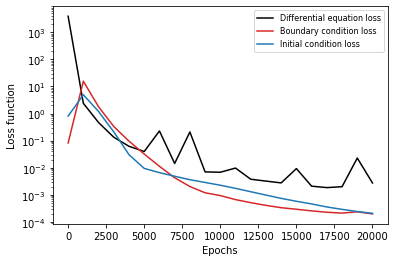

In [6]:
fig, ax = plt.subplots()
#fig, ax = plt.subplots(figsize=(12,10))

ax.plot(combined["epoch"], combined["test_pde_loss"], "k", label="Differential equation loss")
ax.plot(combined["epoch"], combined["total_bc_loss"], "tab:red", label="Boundary condition loss")
ax.plot(combined["epoch"], combined["total_ic_loss"], "tab:blue", label="Initial condition loss")

ax.set_yscale('log')
ax.legend(fontsize=8)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss function")
plt.savefig("case_2_combine.png", dpi=200)